In [106]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import DBSCAN

import pandas as pd
import datetime


df = pd.read_csv("gs://shakingshamrocks_eu/test_data_3_sec.csv")

In [107]:
df.head()

,Unnamed: 0,dates,account_name,account_IBAN,other_account_name,Type,amount,balance
0,0,2018-02-16 02:17:13,Katherine Valencia,DOJO46309747392475,Wages MyOrg,Regular,2300.000000,2300.000000
1,1,2018-02-20 14:29:42,Patrick Hamilton,CJVO60129798466874,Wages MyOrg,Regular,2600.000000,4900.000000
2,2,2018-02-25 21:12:59,Katherine Valencia,DOJO46309747392475,Food Reg,Irregular,-220.577729,4679.422271
3,3,2018-02-28 01:18:39,Katherine Valencia,DOJO46309747392475,Subscription,Regular,-55.000000,4624.422271
4,4,2018-02-28 03:02:54,Katherine Valencia,DOJO46309747392475,Phone,Regular,-18.000000,4606.422271


In [142]:
def convert_to_mins(val):
    try:
        return(int((val.total_seconds()/60)))
    except :
        return np.nan

In [145]:
def convert_to_mins(val):
    try:
        return(int((val.total_seconds()/60)))
    except ValueError:
        return np.nan

def cluster_analysis(df_test):
    df_test['time_since_last_transaction'] = df_test['datetime'] - df['datetime'].shift()
    df_test['time_since_last_transaction']= df_test['time_since_last_transaction'].apply(lambda x: convert_to_mins(x))
    df_test = df_test.reset_index()
    
    main_dict = {}
    for party in list(df_test['other_account_name'].value_counts().index):
        temp_df = df_test[df_test['other_account_name'] == party].copy()
        temp_df['time_since_last_trans_party'] = temp_df['datetime'] - temp_df['datetime'].shift()
        pos_dict = pd.Series(temp_df['time_since_last_trans_party'].values, index = temp_df['index'])
        main_dict.update(pos_dict)
    df_test['time_since_last_transaction_party'] = df_test['index'].map(main_dict)
    df_test['time_since_last_transaction_party']= df_test['time_since_last_transaction_party'].apply(lambda x: convert_to_mins(x))
    
    
    numeric_features = ['amount', 'day', 'time_since_last_transaction_party', 'time_since_last_transaction']
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])
    # account name used as dummy feature
    categorical_features = ['account_name']
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])

    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('cluster', DBSCAN(0.2))])

    df_test.dates = pd.to_datetime(df_test.dates)
    df_test['day'] = df_test.dates.dt.day
    df_test.head()
    #df = df[[]]
    prediction = clf.fit_predict(df_test)

    df_test['prediction'] = "Regular-Irregular"
    df_test.loc[prediction < 0, 'prediction'] = 'Discretionary'

    return df_test

In [147]:
#

Index(['index', 'Unnamed: 0', 'dates', 'account_name', 'account_IBAN',
       'other_account_name', 'Type', 'amount', 'balance', 'datetime',
       'time_since_last_transaction', 'time_since_last_transaction_party',
       'day', 'prediction'],
      dtype='object')

In [57]:
df['dates'] = pd.to_datetime(df.dates)

In [87]:

np.random.seed(0)


df_test = df[df['account_name'] == 'Amy Morris']
df_test['day'] = df_test.dates.dt.day
df_test.head()

numeric_features = ['amount', 'day']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
# account name used as dummy feature
categorical_features = ['account_name']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')



preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('cluster', DBSCAN(0.2))])

prediction = clf.fit_predict(df_test)

df_test['prediction'] = prediction

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [95]:
def cluster_analysis(df_test):


    numeric_features = ['amount', 'day']
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])
    # account name used as dummy feature
    categorical_features = ['account_name']
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])

    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('cluster', DBSCAN(0.2))])
    
    
    
    
    df_test['day'] = df_test.dates.dt.day
    df_test.head()

    prediction = clf.fit_predict(df_test)
    
    
    
    df_test['prediction'] = "Regular-Irregular"
    df_test.loc[prediction< 0,'prediction'] = 'Discretionary'
    
    return df_test


In [96]:

df_test = df[df['account_name'] == 'Amy Morris']

In [97]:
cluster_analysis(df_test)['prediction'].to_list()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

['Regular-Irregular',
 'Regular-Irregular',
 'Regular-Irregular',
 'Regular-Irregular',
 'Regular-Irregular',
 'Regular-Irregular',
 'Regular-Irregular',
 'Regular-Irregular',
 'Regular-Irregular',
 'Regular-Irregular',
 'Discretionary',
 'Regular-Irregular',
 'Discretionary',
 'Regular-Irregular',
 'Regular-Irregular',
 'Regular-Irregular',
 'Regular-Irregular',
 'Regular-Irregular',
 'Regular-Irregular',
 'Regular-Irregular',
 'Discretionary',
 'Discretionary',
 'Discretionary',
 'Discretionary',
 'Regular-Irregular',
 'Discretionary',
 'Discretionary',
 'Discretionary',
 'Discretionary',
 'Regular-Irregular',
 'Regular-Irregular',
 'Regular-Irregular',
 'Regular-Irregular',
 'Regular-Irregular',
 'Regular-Irregular',
 'Regular-Irregular',
 'Regular-Irregular',
 'Regular-Irregular',
 'Regular-Irregular',
 'Regular-Irregular',
 'Regular-Irregular',
 'Regular-Irregular',
 'Regular-Irregular',
 'Discretionary',
 'Discretionary',
 'Discretionary',
 'Discretionary',
 'Discretionary',
 'Re

In [22]:
df_json = df.to_json()

In [23]:
# regular - irrr - discressionary 

<AxesSubplot:>

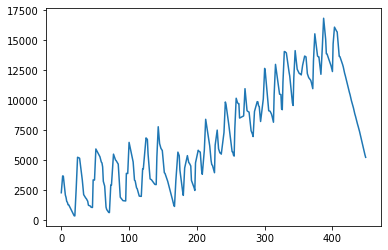